# Class 5: Hyperparameter-Tuning and Model Fitting Using Scikit-Learn 

Link: https://scikit-learn.org/stable/index.html

In [2]:
import matplotlib.pyplot as plt

from sklearn.svm import SVC 
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
# Load a builtin dataset with hand-written digits
digits = datasets.load_digits()

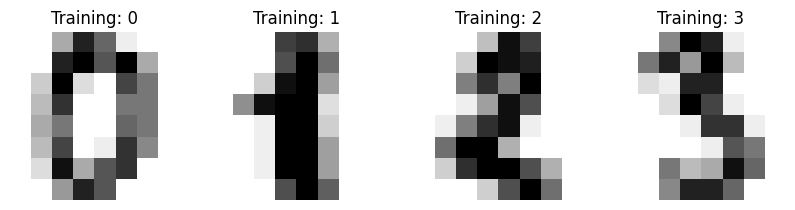

In [4]:
# Plot a few samples
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [5]:
# Shape of image data
digits.images.shape

(1797, 8, 8)

In [6]:
# Flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data.shape

(1797, 64)

In [10]:
# defining search grid for SVM 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear', 'rbf']}  

In [7]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, random_state=10)

In [8]:
# Instantiate SVM and denote the number of folds
svm_model = SVC()
cv = 5

In [11]:
# Define grid search 
grid = GridSearchCV(svm_model, param_grid, cv=cv, verbose = 0, n_jobs = -1) 

In [13]:
grid.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [14]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [15]:
print(grid.cv_results_)

{'mean_fit_time': array([0.04011359, 0.39190416, 0.03006072, 0.21996684, 0.02970972,
       0.20858898, 0.02875566, 0.13195386, 0.03217926, 0.17570953,
       0.02759342, 0.40253835, 0.03174696, 0.24820838, 0.03321939,
       0.26136045, 0.03218889, 0.08153701, 0.02769704, 0.06285   ,
       0.0349051 , 0.4318646 , 0.03317041, 0.26645455, 0.03202524,
       0.25610714, 0.03287344, 0.07997022, 0.0364172 , 0.0471312 ,
       0.03976769, 0.44943542, 0.03347206, 0.2866827 , 0.03814893,
       0.22580214, 0.03518534, 0.08802233, 0.03719373, 0.04379487]), 'std_fit_time': array([0.00681186, 0.00745417, 0.00432171, 0.01033318, 0.00319293,
       0.00964615, 0.00432623, 0.00844592, 0.00951505, 0.00559273,
       0.0049683 , 0.01147134, 0.00251187, 0.02578311, 0.00371572,
       0.00789332, 0.00603259, 0.00580753, 0.00339208, 0.01062644,
       0.00678085, 0.01084357, 0.00494432, 0.00523976, 0.00900264,
       0.00915579, 0.0012312 , 0.00955117, 0.00770035, 0.00359374,
       0.00605383, 0.01251

In [16]:
grid_predictions = grid.predict(X_test) 

In [17]:
# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        34
           5       0.97      0.97      0.97        32
           6       1.00      1.00      1.00        37
           7       0.98      1.00      0.99        40
           8       1.00      1.00      1.00        33
           9       0.97      0.95      0.96        39

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [27]:
# Instantiate
svm_model = SVC(kernel='rbf', C=10, gamma=0.001)

# Fit
svm_model.fit(X_train, y_train)

# Predict
svm_preds = svm_model.predict(X_test)

# Validate
print(classification_report(y_test, svm_preds)) 